In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.ensemble import RandomForestClassifier # ランダムフォレスト
from sklearn.svm import LinearSVC #SVM
from sklearn.calibration import CalibratedClassifierCV # For probability score output (SVM用)
from sklearn.neighbors import KNeighborsClassifier # K近傍
from sklearn.naive_bayes import GaussianNB #ナイーブベイズ

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./input_data/telecom_churn.csv')
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


## EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   int64  
 1   account_length                 5000 non-null   int64  
 2   area_code                      5000 non-null   int64  
 3   phone_number                   5000 non-null   int64  
 4   international_plan             5000 non-null   int64  
 5   voice_mail_plan                5000 non-null   int64  
 6   number_vmail_messages          5000 non-null   int64  
 7   total_day_minutes              5000 non-null   float64
 8   total_day_calls                5000 non-null   int64  
 9   total_day_charge               5000 non-null   float64
 10  total_eve_minutes              5000 non-null   float64
 11  total_eve_calls                5000 non-null   int64  
 12  total_eve_charge               5000 non-null   f

In [4]:
df.isna().sum()

state                            0
account_length                   0
area_code                        0
phone_number                     0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
class                            0
dtype: int64

In [5]:
df.describe()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
count,5000.00000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,25.99840,100.25860,436.911400,2499.500000,0.094600,0.264600,7.755200,180.288900,100.029400,30.649668,...,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196,1.570400,0.141400
std,14.80348,39.69456,42.209182,1443.520003,0.292691,0.441164,13.546393,53.894699,19.831197,9.162069,...,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514,1.306363,0.348469
min,0.00000,1.00000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.00000,73.00000,408.000000,1249.750000,0.000000,0.000000,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,26.00000,100.00000,415.000000,2499.500000,0.000000,0.000000,0.000000,180.100000,100.000000,30.620000,...,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,39.00000,127.00000,415.000000,3749.250000,0.000000,1.000000,17.000000,216.200000,113.000000,36.750000,...,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000,0.000000
max,50.00000,243.00000,510.000000,4999.000000,1.000000,1.000000,52.000000,351.500000,165.000000,59.760000,...,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


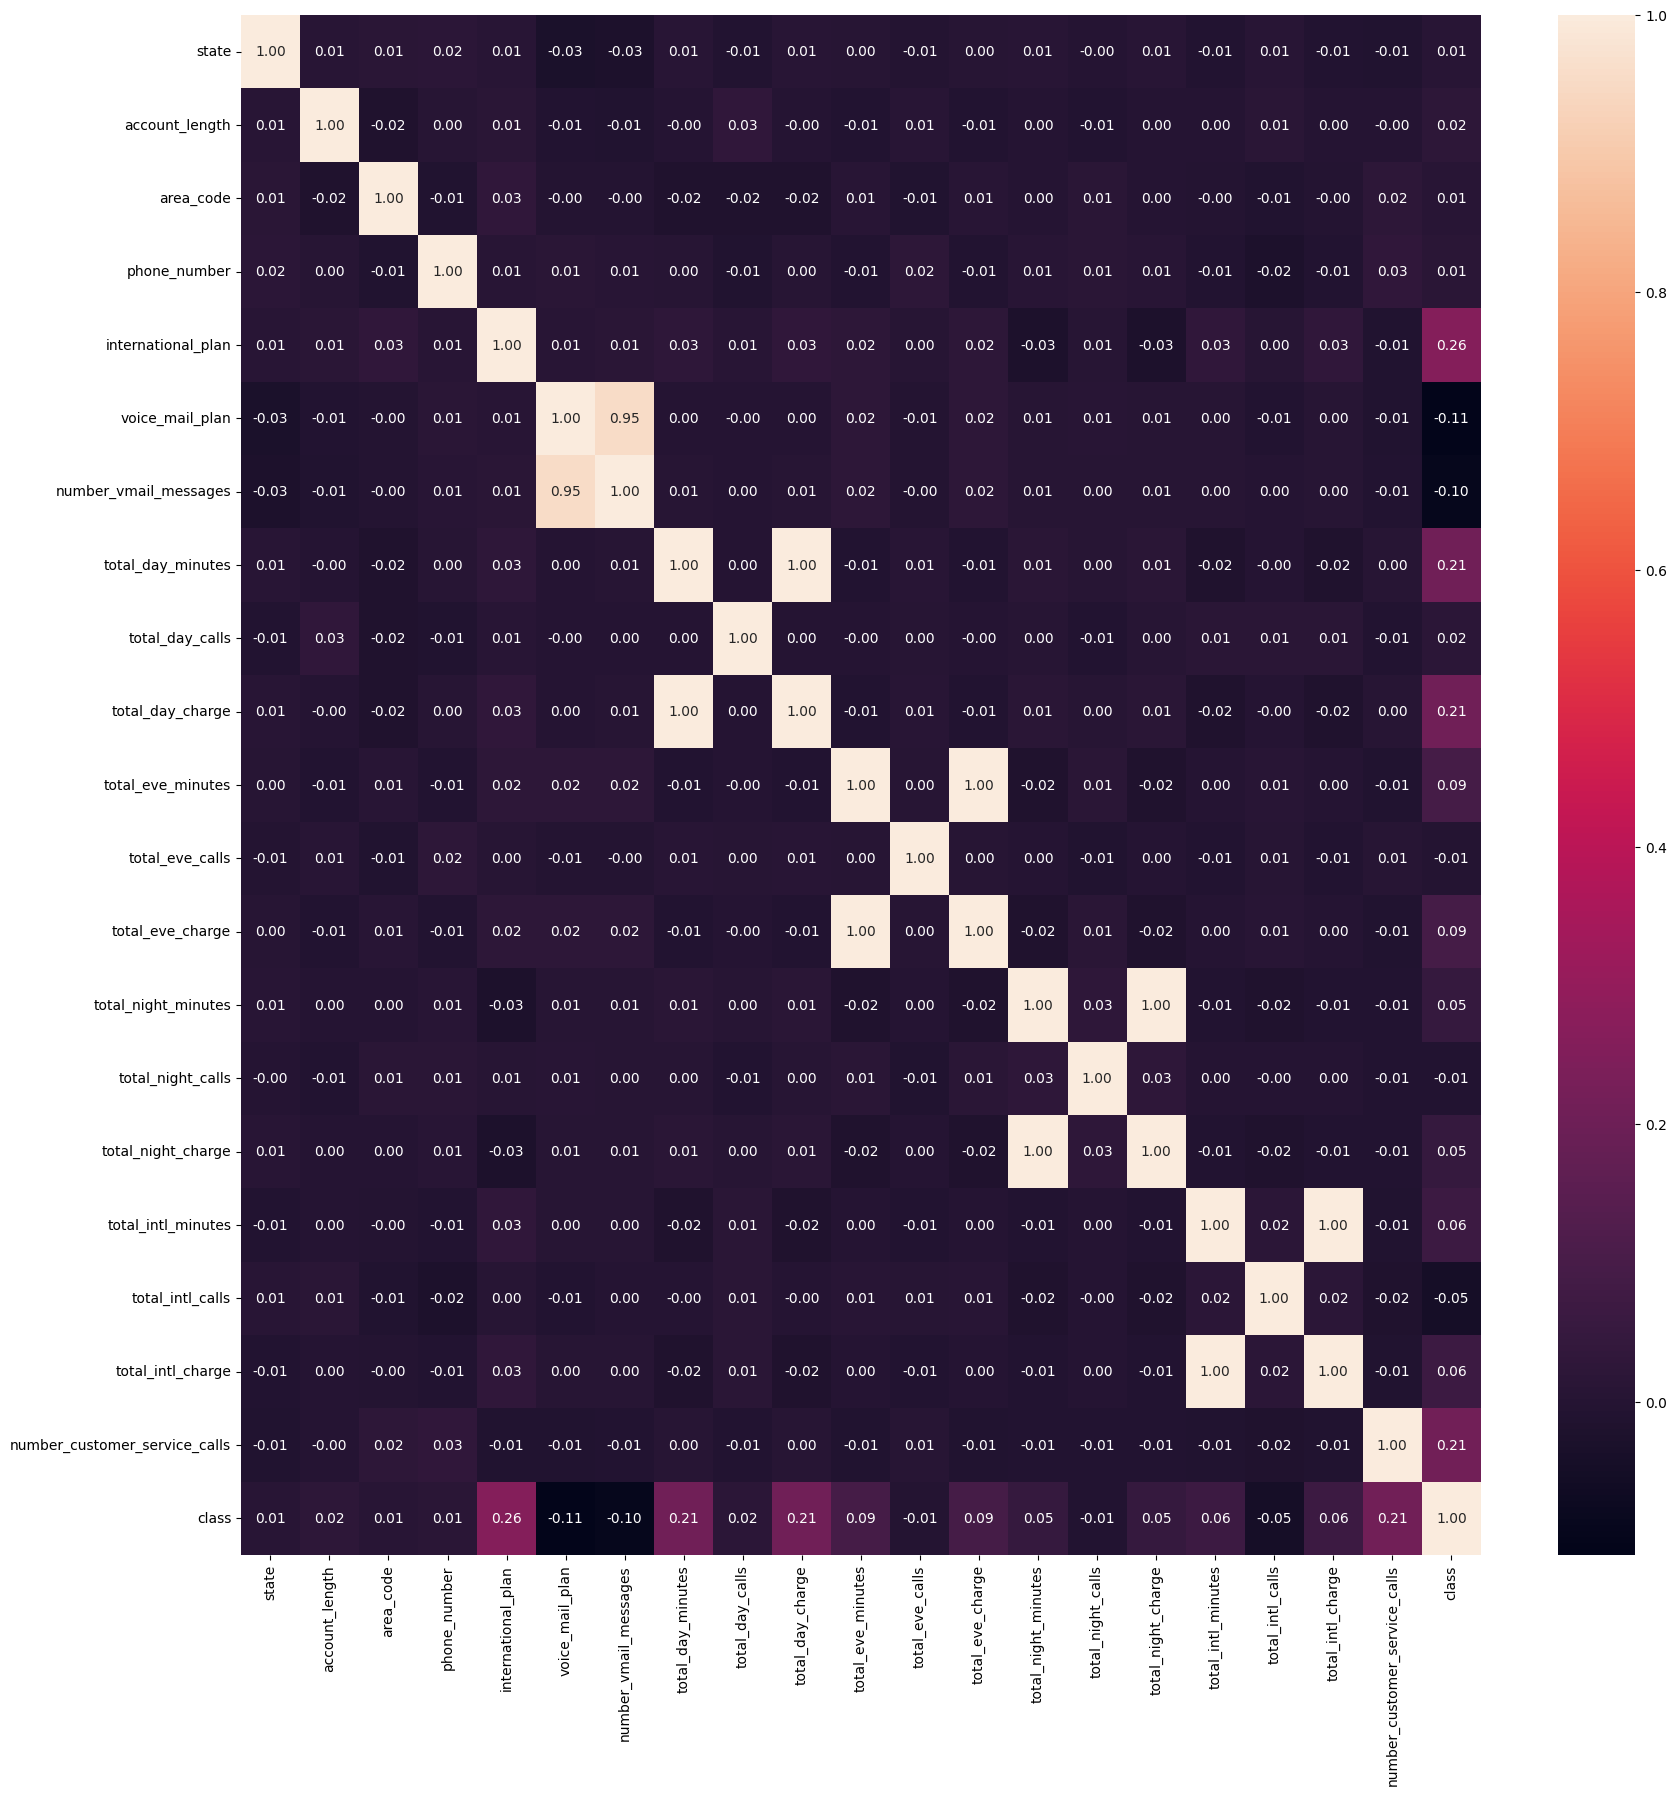

In [6]:
corr_metrics = df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr_metrics, annot=True, fmt=".2f");

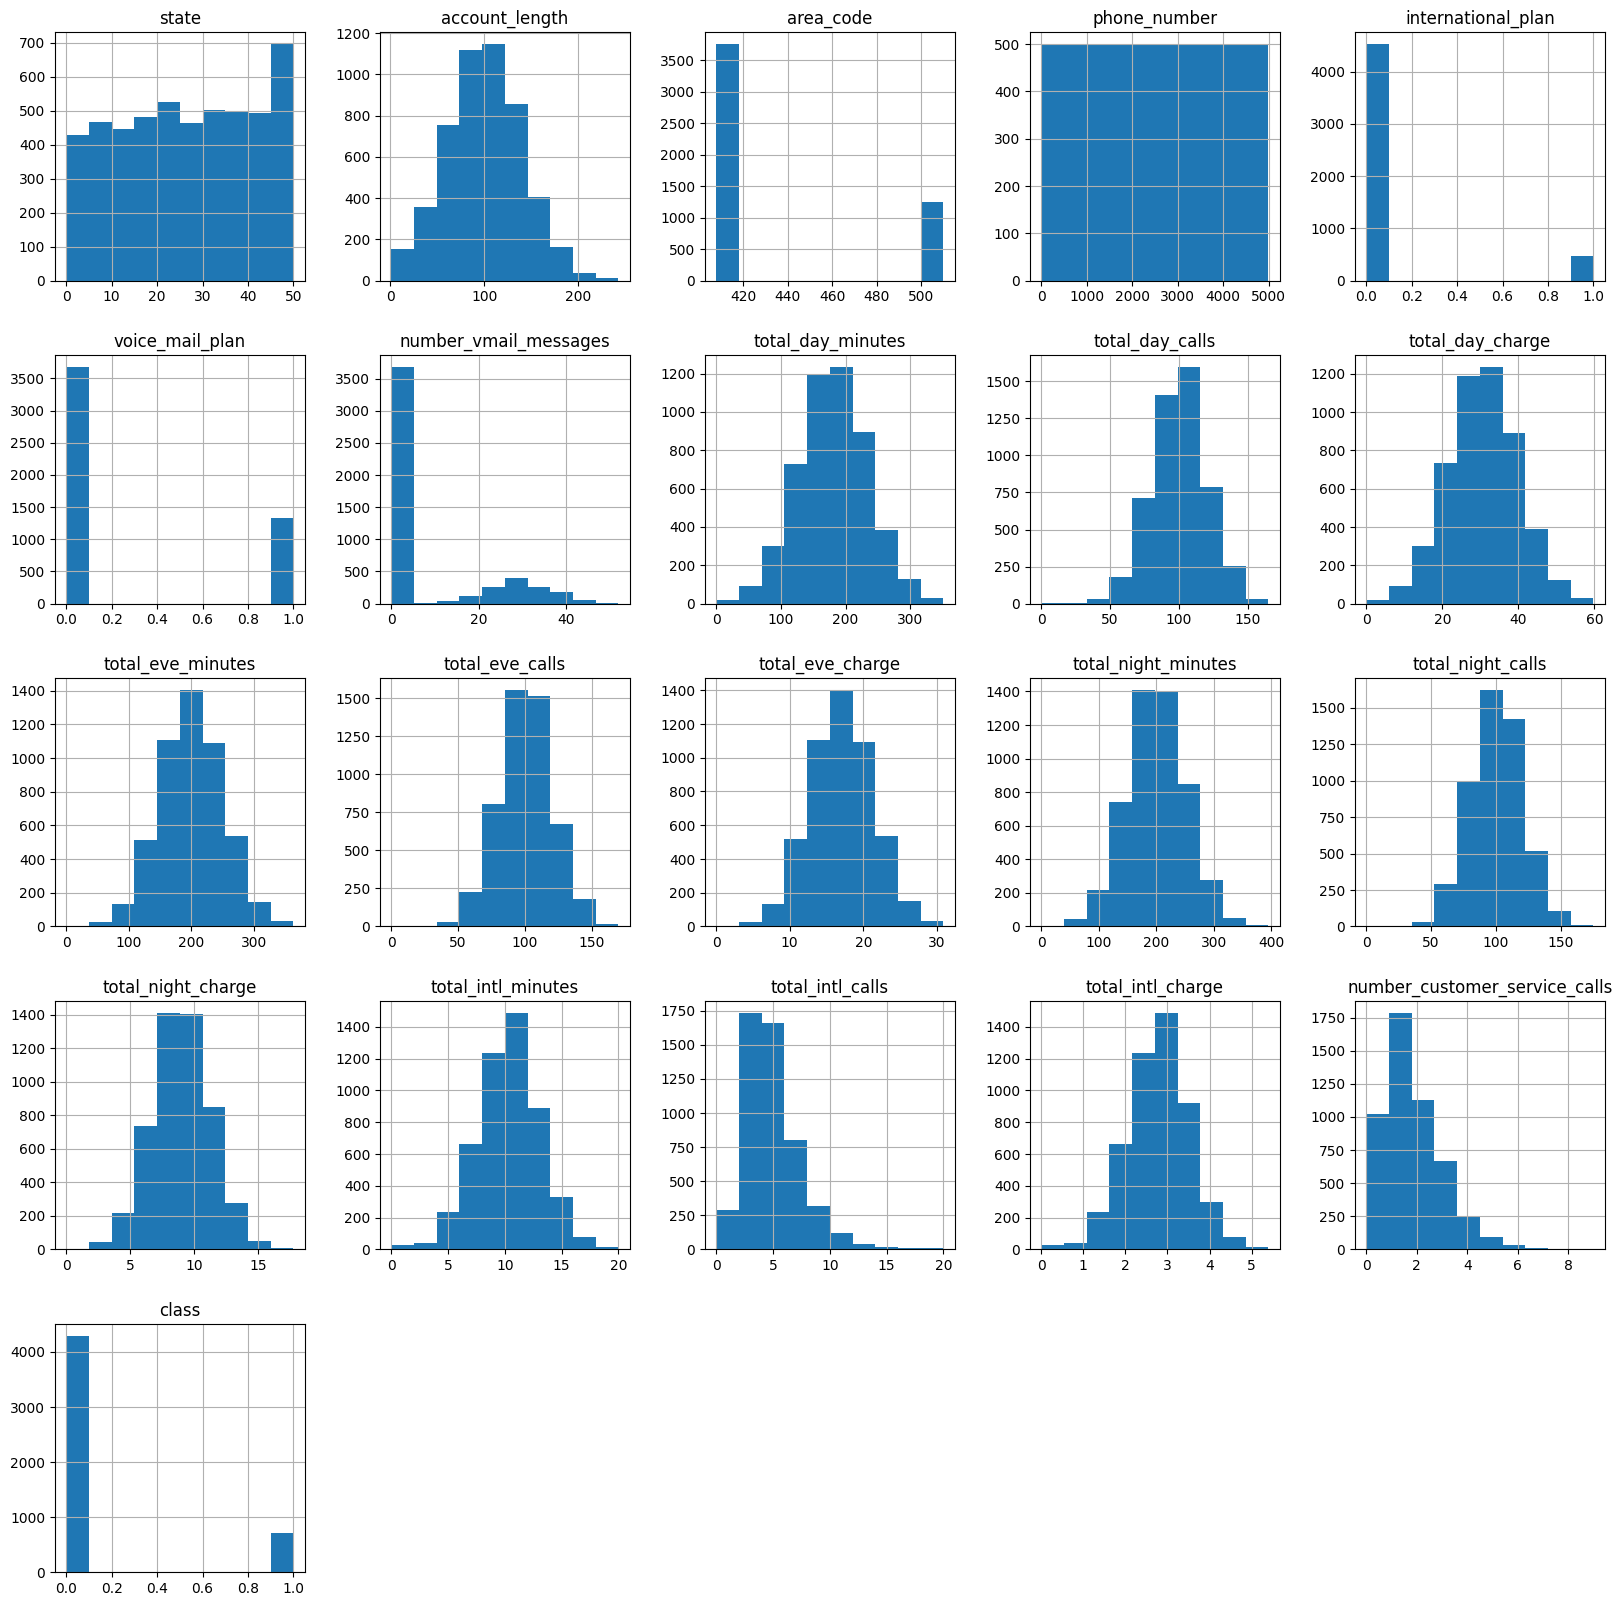

In [7]:
df.hist(figsize=(20, 20))
plt.show()

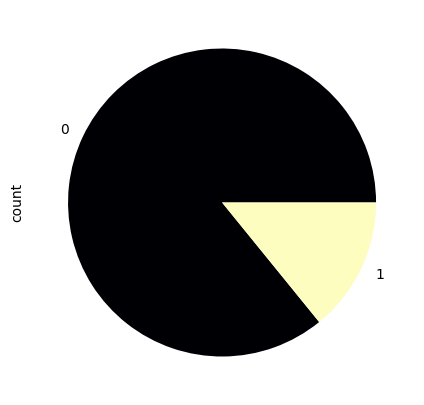

In [8]:
plt.figure(figsize=(5, 5))
df['class'].value_counts().plot(kind='pie', colormap='magma')
plt.show()

<Axes: xlabel='total_day_charge', ylabel='Density'>

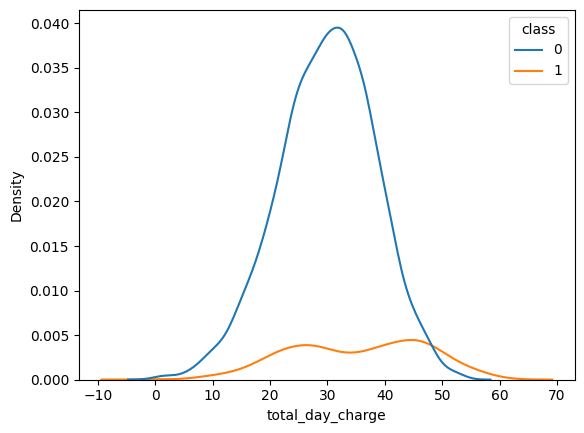

In [9]:
sns.kdeplot(data=df, x='total_day_charge', hue='class')

## Analysis

In [10]:
y = df['class']
X = df.drop(['class', 'area_code', 'phone_number'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

### RandomForest

In [11]:
rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

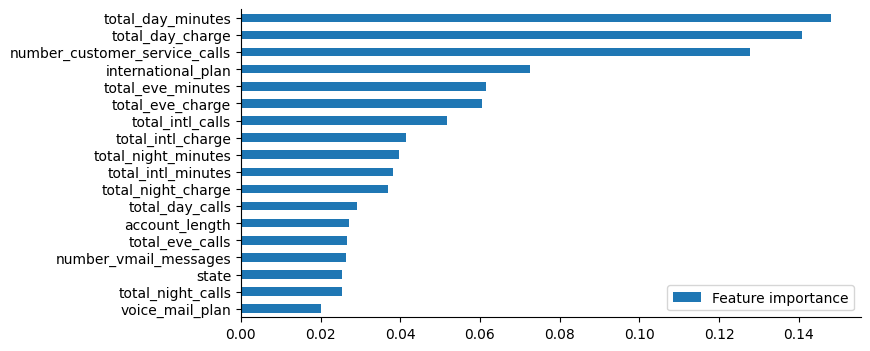

In [12]:
# 特徴量の重要度（寄与率）
feature_df = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['Feature importance'])\
.sort_values('Feature importance', ascending=True)

feature_df.plot(kind='barh', figsize=(8,4))
sns.despine()

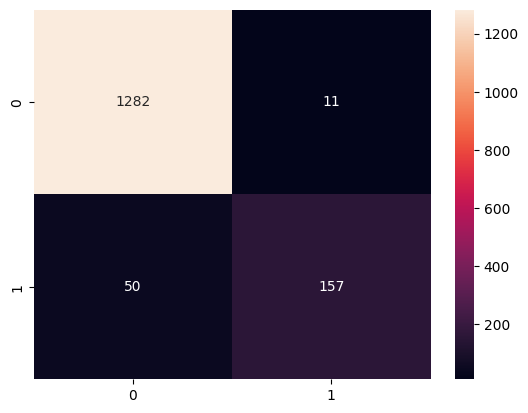

In [13]:
# 評価
y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1293
           1       0.93      0.76      0.84       207

    accuracy                           0.96      1500
   macro avg       0.95      0.87      0.91      1500
weighted avg       0.96      0.96      0.96      1500



### ロジスティック回帰

In [15]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

/Users/yoshifumi/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

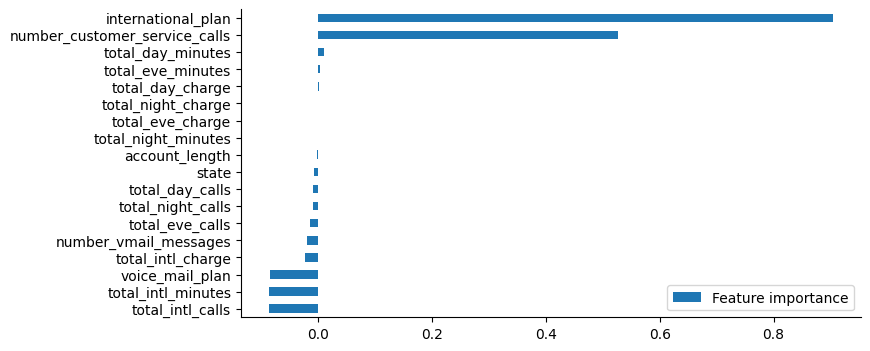

In [16]:
# 特徴量の重要度（寄与率）
feature_df = pd.DataFrame(lr.coef_[0], index=X.columns, columns=['Feature importance'])\
.sort_values('Feature importance', ascending=True)

feature_df.plot(kind='barh', figsize=(8,4))
sns.despine()

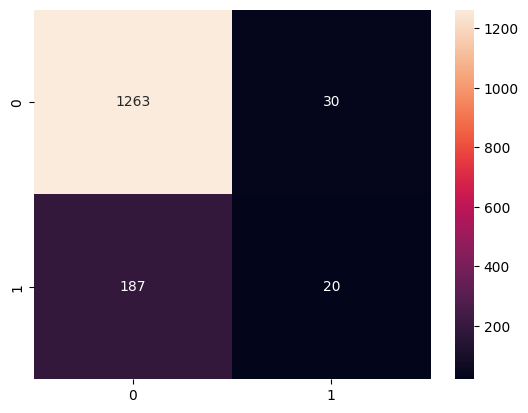

In [17]:
# 評価
y_pred = lr.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1293
           1       0.40      0.10      0.16       207

    accuracy                           0.86      1500
   macro avg       0.64      0.54      0.54      1500
weighted avg       0.81      0.86      0.82      1500



### サポートベクターマシン

In [19]:
svc = LinearSVC(max_iter=100000) #svm
svm = CalibratedClassifierCV(svc) #svc
svm.fit(X_train, y_train)

/Users/yoshifumi/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yoshifumi/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yoshifumi/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yoshifumi/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/yoshifumi/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


CalibratedClassifierCV(estimator=LinearSVC(max_iter=100000))

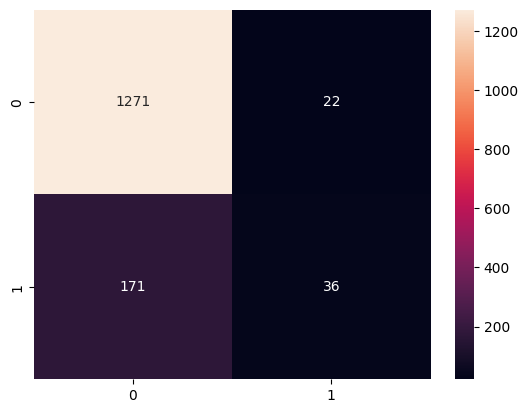

In [20]:
# 評価
y_pred = svm.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1293
           1       0.62      0.17      0.27       207

    accuracy                           0.87      1500
   macro avg       0.75      0.58      0.60      1500
weighted avg       0.85      0.87      0.84      1500



### k-近傍法

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

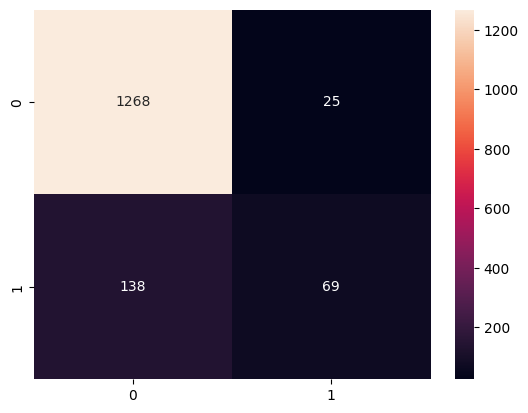

In [23]:
# 評価
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [24]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1293
           1       0.73      0.33      0.46       207

    accuracy                           0.89      1500
   macro avg       0.82      0.66      0.70      1500
weighted avg       0.88      0.89      0.87      1500



### ナイーブベイズ

In [25]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

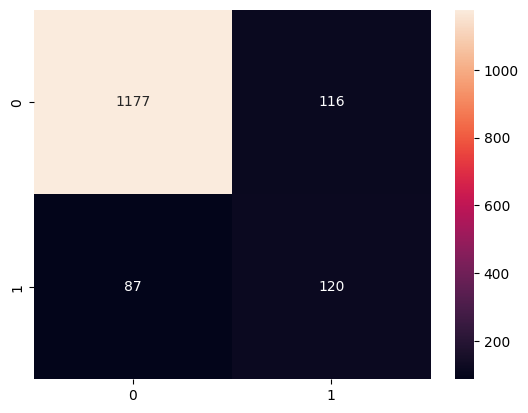

In [26]:
y_pred = gnb.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d');

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1293
           1       0.51      0.58      0.54       207

    accuracy                           0.86      1500
   macro avg       0.72      0.74      0.73      1500
weighted avg       0.87      0.86      0.87      1500



In [38]:
# ROC curve
from sklearn.metrics import roc_curve

fpr0, tpr0, thresh0 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr1, tpr1, thresh1 = roc_curve(y_test, lr.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(y_test, svm.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(y_test, rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(y_test, knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, gnb.predict_proba(X_test)[:, 1], pos_label = 1)


In [44]:
# AUC score

from sklearn.metrics import roc_auc_score

auc_score1 = roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(y_test, svm.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(y_test, gnb.predict_proba(X_test)[:, 1])

In [45]:
print("Logistic Regression: ", auc_score1) # Logistic Regression
print("Support Vector Machine: ", auc_score2) # Support Vector Machine
print("Random Forest: ", auc_score3) # Random Forest
print("K-Nearest Neighbors: ", auc_score4) # K-Nearest Neighbors
print("Naive Bayes: ", auc_score5) # Naive Bayes

Logistic Regression:  0.7546058112990424
Support Vector Machine:  0.833335201437693
Random Forest:  0.9165069437439052
K-Nearest Neighbors:  0.6927454035292229
Naive Bayes:  0.8523599762377125


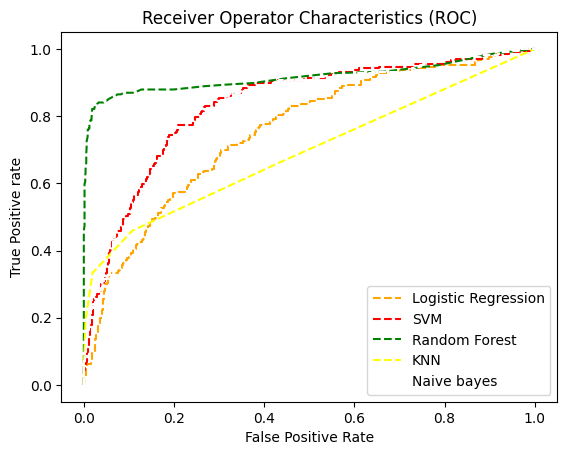

In [46]:
plt.plot(fpr1, tpr1, linestyle = "--", color = "orange", label = "Logistic Regression")
plt.plot(fpr2, tpr2, linestyle = "--", color = "red", label = "SVM")
plt.plot(fpr3, tpr3, linestyle = "--", color = "green", label = "Random Forest")
plt.plot(fpr4, tpr4, linestyle = "--", color = "yellow", label = "KNN")
plt.plot(fpr5, tpr5, linestyle = "--", color = "white", label = "Naive bayes")

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()

- 学習させたモデルの中で、Random Forest Classifierアルゴリズムは、ROC曲線下面積（AUC）を最も高くしました。

## And More ...

### AutoGluon

In [55]:
from autogluon.tabular import TabularPredictor
from tqdm import tqdm

In [58]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [80]:
predictor = TabularPredictor(label="class", problem_type = 'binary', eval_metric = 'recall')
predictor.fit(train_data = train, time_limit = 200, presets = "high_quality_fast_inference_only_refit")

No path specified. Models will be saved in: "AutogluonModels/ag-20230427_071900/"
Preset alias specified: 'high_quality_fast_inference_only_refit' maps to 'high_quality'.
Presets specified: ['high_quality_fast_inference_only_refit']
Stack configuration (auto_stack=True): num_stack_levels=0, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 200s
AutoGluon will save models to "AutogluonModels/ag-20230427_071900/"
AutoGluon Version:  0.7.0
Python Version:     3.9.6
Operating System:   Darwin
Platform Machine:   arm64
Platform Version:   Darwin Kernel Version 22.1.0: Sun Oct  9 20:19:12 PDT 2022; root:xnu-8792.41.9~3/RELEASE_ARM64_T6020
Train Data Rows:    3500
Train Data Columns: 20
Label Column: class
Preprocessing data ...
Selected class <--> label mapping:  class 1 = 1, class 0 = 0
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    6444.85 MB
	Train Data (Original)  Memory Usag

	79.43s	 = Training   runtime
	0.11s	 = Validation runtime
Repeating k-fold bagging: 5/20
Fitting model: XGBoost_BAG_L1 ... Training model for up to 89.23s of the 89.23s of remaining time.
	Fitting 8 child models (S5F1 - S5F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.754	 = Validation score   (recall)
	37.46s	 = Training   runtime
	0.07s	 = Validation runtime
Fitting model: NeuralNetTorch_BAG_L1 ... Training model for up to 80.98s of the 80.98s of remaining time.
	Fitting 8 child models (S5F1 - S5F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.72	 = Validation score   (recall)
	98.77s	 = Training   runtime
	0.13s	 = Validation runtime
Repeating k-fold bagging: 6/20
Fitting model: XGBoost_BAG_L1 ... Training model for up to 61.6s of the 61.6s of remaining time.
	Fitting 8 child models (S6F1 - S6F8) | Fitting with SequentialLocalFoldFittingStrategy
	0.766	 = Validation score   (recall)
	45.22s	 = Training   runtime
	0.09s	 = Validation runtime
Fitting model: NeuralNe

In [77]:
predictor.fit_summary();

*** Summary of fit() ***
Estimated performance of each model:
                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.962000       0.298718  174.053867                0.002513           0.381418            2       True          9
1           XGBoost_BAG_L1   0.960000       0.097227   32.248715                0.097227          32.248715            1       True          7
2  RandomForestGini_BAG_L1   0.955714       0.073796    0.354158                0.073796           0.354158            1       True          3
3  RandomForestEntr_BAG_L1   0.953143       0.073413    0.330679                0.073413           0.330679            1       True          4
4    NeuralNetTorch_BAG_L1   0.938857       0.198978  141.423734                0.198978         141.423734            1       True          8
5    ExtraTreesEntr_BAG_L1   0.928286       0.080993    0.257983                

/Users/yoshifumi/Library/Python/3.9/lib/python/site-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


In [74]:
predictor.leaderboard()

                     model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L2   0.962000       0.298718  174.053867                0.002513           0.381418            2       True          9
1           XGBoost_BAG_L1   0.960000       0.097227   32.248715                0.097227          32.248715            1       True          7
2  RandomForestGini_BAG_L1   0.955714       0.073796    0.354158                0.073796           0.354158            1       True          3
3  RandomForestEntr_BAG_L1   0.953143       0.073413    0.330679                0.073413           0.330679            1       True          4
4    NeuralNetTorch_BAG_L1   0.938857       0.198978  141.423734                0.198978         141.423734            1       True          8
5    ExtraTreesEntr_BAG_L1   0.928286       0.080993    0.257983                0.080993           0.257983            1       True          6

,model,score_val,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.962000,0.298718,174.053867,0.002513,0.381418,2,True,9
1,XGBoost_BAG_L1,0.960000,0.097227,32.248715,0.097227,32.248715,1,True,7
2,RandomForestGini_BAG_L1,0.955714,0.073796,0.354158,0.073796,0.354158,1,True,3
3,RandomForestEntr_BAG_L1,0.953143,0.073413,0.330679,0.073413,0.330679,1,True,4
4,NeuralNetTorch_BAG_L1,0.938857,0.198978,141.423734,0.198978,141.423734,1,True,8
5,ExtraTreesEntr_BAG_L1,0.928286,0.080993,0.257983,0.080993,0.257983,1,True,6
6,ExtraTreesGini_BAG_L1,0.927714,0.081771,0.256276,0.081771,0.256276,1,True,5
7,KNeighborsDist_BAG_L1,0.860571,0.018286,0.001938,0.018286,0.001938,1,True,2
8,KNeighborsUnif_BAG_L1,0.860286,0.017444,0.002396,0.017444,0.002396,1,True,1


In [62]:
# 評価の高いモデルのスコアが出てくる
predictor.evaluate(test)

Evaluation: accuracy on test data: 0.9646666666666667
Evaluations on test data:
{
    "accuracy": 0.9646666666666667,
    "balanced_accuracy": 0.8821244830021184,
    "mcc": 0.8446837550040028,
    "roc_auc": 0.9245061666124916,
    "f1": 0.857142857142857,
    "precision": 0.9695121951219512,
    "recall": 0.7681159420289855
}


{'accuracy': 0.9646666666666667,
 'balanced_accuracy': 0.8821244830021184,
 'mcc': 0.8446837550040028,
 'roc_auc': 0.9245061666124916,
 'f1': 0.857142857142857,
 'precision': 0.9695121951219512,
 'recall': 0.7681159420289855}

In [78]:
predictor.get_model_names()

['KNeighborsUnif_BAG_L1',
 'KNeighborsDist_BAG_L1',
 'RandomForestGini_BAG_L1',
 'RandomForestEntr_BAG_L1',
 'ExtraTreesGini_BAG_L1',
 'ExtraTreesEntr_BAG_L1',
 'XGBoost_BAG_L1',
 'NeuralNetTorch_BAG_L1',
 'WeightedEnsemble_L2']

In [79]:
# モデルごとに評価をしたい場合はパラメータにモデル名を追記する。
predictor.evaluate(test, model='KNeighborsUnif_BAG_L1')

Evaluation: accuracy on test data: 0.8593333333333333
Evaluations on test data:
{
    "accuracy": 0.8593333333333333,
    "balanced_accuracy": 0.5451147202887342,
    "mcc": 0.17336590723771708,
    "roc_auc": 0.636933917676377,
    "f1": 0.178988326848249,
    "precision": 0.46,
    "recall": 0.1111111111111111
}


{'accuracy': 0.8593333333333333,
 'balanced_accuracy': 0.5451147202887342,
 'mcc': 0.17336590723771708,
 'roc_auc': 0.636933917676377,
 'f1': 0.178988326848249,
 'precision': 0.46,
 'recall': 0.1111111111111111}

<Axes: >

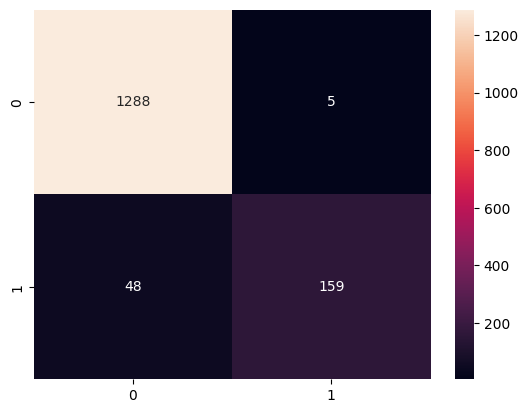

In [69]:
pred = predictor.predict(test)
cm = confusion_matrix(test['class'], pred)
sns.heatmap(cm, annot=True, fmt='d')